# Scraping page un seul produit

## Étape1: récupération des données brutes

In [88]:
import requests
response = requests.get("https://fr.openfoodfacts.org/produit/3017620422003/nutella-ferrero")

In [89]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

In [90]:
response.text ##affichage du html tel qu'il est récupérer via BeautifulSoup, car différent du html affivhé dans navigateur

'<!doctype html>\n<html class="no-js" lang="fr" data-serverdomain="openfoodfacts.org" dir="ltr">\n<head>\n    <meta charset="utf-8">\n    <title>Nutella - Ferrero - 400\xa0g</title>\n    <meta name="description" content="Ingrédients, allergènes, additifs, composition nutritionnelle, labels, origine des ingrédients et informations du produit Nutella - Ferrero - 400\xa0g">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\t<meta property="fb:app_id" content="219331381518041">\n    <meta property="og:type" content="food">\n    <meta property="og:title" content="">\n    <meta property="og:url" content="https://fr.openfoodfacts.org/produit/3017620422003/nutella-ferrero">\n    \n    <meta property="og:image" content="https://static.openfoodfacts.org/images/misc/openfoodfacts-logo-fr-356.png">\n    <meta property="og:description" content="">\n    <link rel="manifest" href="/cgi/manifest.pl">\n<link rel="mask-icon" href="https://static.openfoodfacts.org/images/favic

In [91]:
name = soup.find('h1', attrs = {'property':'food:name'})#recuperer le nom du produit 

In [92]:
name.text.strip().replace('\xa0', '')

'Nutella - Ferrero - 400g'

In [93]:
bar_code = soup.find('span', attrs = {'id':'barcode'}) #recuperer le code a barre

In [94]:
bar_code.text

'3017620422003'

In [95]:
nutri_score = soup.find_all('a', attrs = {'href' :'/nutriscore'})[1].find('img')#recuperer le nutri score

In [9]:
nutri_score.attrs['alt']

'Note nutritionnelle NutriScore : E'

In [10]:
nova = soup.find_all('a',attrs = {'href':'/nova'})[1].find('img')#recuperer le nova score

In [11]:
nova.attrs['alt']

'4 - Produits alimentaires et boissons ultra-transformés'

In [97]:
eco_score = soup.find_all('a',attrs = {'href':'/ecoscore'})[2].find('img')#recuperer le  l'eco score

In [98]:
eco_score.attrs['alt'].split(' ')[1]

'D'

In [14]:
generic_name = soup.find('span',attrs = {'itemprop':'description'})#recuperer la donimination génerique

In [15]:
generic_name.text

'Pâte à tartiner aux noisettes et au cacao'

In [16]:
quantity = soup.find_all('span',attrs = {'class':'field'})[1].next_sibling#recuperer la quantité 

In [17]:
quantity

' 400 g'

In [18]:
packs = soup.find_all('span',attrs = {'class':'field'})[2].parent.find_all('a')#recuperer le conditionement

In [19]:
packs_data = []
for pack in packs:
    packs_data.append(pack.text)

In [20]:
packs_data

['Verre', 'Couvercle', 'Plastique', 'Pot', 'Opercule', 'Plaque en carton']

In [21]:
brands = soup.find_all('span',attrs = {'class':'field'})[3].parent.find_all('a')#recuperer la marque

In [22]:
brands_data =[]
for brand in brands:
    brands_data.append(brand.text)

In [23]:
brands_data

['Ferrero', 'Nutella']

In [24]:
categories = soup.find_all('span',attrs = {'class':'field'})[4].parent.find_all('a')#recuperer les catégories

In [25]:
categories_data =[]
for categorie in categories:
    categories_data.append(categorie.text)

In [26]:
categories_data

['Produits à tartiner',
 'Petit-déjeuners',
 'Aides culinaires',
 'Produits à tartiner sucrés',
 'Aides à la pâtisserie',
 'Pâtes à tartiner',
 'Pâtes à tartiner aux noisettes',
 'Pâtes à tartiner au chocolat',
 'Pâtes à tartiner aux noisettes et au cacao',
 'Aide culinaire sucrée']

In [27]:
labels = soup.find_all('span',attrs = {'class':'field'})[5].parent.find_all('a') #recuperer les labels

In [28]:
labels_data = []
for label in labels:
    labels_data.append(label.text)
    

In [29]:
labels_data

['Sans gluten', 'Point Vert']

In [30]:
origins = soup.find_all('span', attrs = {'class':'field'})[6].parent.find_all('a')#recuperer les origines

In [31]:
origins

[<a class="tag well_known" href="/origine/australie">Australie</a>,
 <a class="tag well_known" href="/origine/bresil">Brésil</a>,
 <a class="tag well_known" href="/origine/chili">Chili</a>,
 <a class="tag well_known" href="/origine/cote-d-ivoire">Côte d'Ivoire</a>,
 <a class="tag well_known" href="/origine/ghana">Ghana</a>,
 <a class="tag well_known" href="/origine/inde">Inde</a>,
 <a class="tag well_known" href="/origine/indonesie">Indonésie</a>,
 <a class="tag well_known" href="/origine/italie">Italie</a>,
 <a class="tag well_known" href="/origine/malaisie">Malaisie</a>,
 <a class="tag well_known" href="/origine/mexique">Mexique</a>,
 <a class="tag well_known" href="/origine/nigeria">Nigeria</a>,
 <a class="tag well_known" href="/origine/papouasie-nouvelle-guinee">Papouasie-Nouvelle-Guinée</a>,
 <a class="tag well_known" href="/origine/turquie">Turquie</a>]

In [32]:
origins_data = []
for origin in origins:
    origins_data.append(origin.text)

In [33]:
origins_data

['Australie',
 'Brésil',
 'Chili',
 "Côte d'Ivoire",
 'Ghana',
 'Inde',
 'Indonésie',
 'Italie',
 'Malaisie',
 'Mexique',
 'Nigeria',
 'Papouasie-Nouvelle-Guinée',
 'Turquie']

In [34]:
manufacturers_countries = soup.find_all('span', attrs = {'class':'field'})[7].parent.find_all('a')#recuperer pays de fabrication 

In [35]:
manufacturers_countries_data = []
for manufacturers_country in manufacturers_countries:
    manufacturers_countries_data.append(manufacturers_country.text)

In [36]:
manufacturers_countries_data

['France']

In [37]:
tracking_codes = soup.find_all('span', attrs = {'class':'field'})[8].parent.find_all('a')#recuperer le cod de traçabilités 

In [38]:
tracking_codes_data = []
for tracking_code in tracking_codes:
    tracking_codes_data.append(tracking_code.text)

In [39]:
tracking_codes_data

['NON COMMUNIQUÉ']

In [40]:
official_links = soup.find_all('span', attrs = {'class':'field'})[9].parent.find_all('a')#recuperer le lien vers la page du produit

In [41]:
official_link = official_links[0].attrs['href']

In [42]:
official_link

'https://www.nutella.com/fr/fr/produits/nutella'

In [43]:
shops = soup.find_all('span', attrs = {'class':'field'})[10].parent.find_all('a')#recuperer les magasins

In [44]:
shops_data = []
for shop in shops:
    shops_data.append(shop.text)

In [45]:
shops_data

['Bi1', 'Magasins U', 'Carrefour', 'Franprix', 'Auchan']

In [46]:
countries_sale = soup.find_all('span', attrs = {'class':'field'})[11].parent.find_all('a')#récuperer les pays de vente

In [47]:
countries_sale_data = []
for country_sale in countries_sale:
    countries_sale_data.append(country_sale.text)

In [48]:
countries_sale_data

['Algérie',
 'Autriche',
 'Belgique',
 'Canada',
 'France',
 'Allemagne',
 'Italie',
 'Luxembourg',
 'Mexique',
 'Maroc',
 'Pays-Bas',
 'Portugal',
 'Sénégal',
 'Espagne',
 'Suisse',
 'Tunisie',
 'Royaume-Uni',
 'États-Unis']

In [49]:
ingredients_list = soup.find('div', attrs = {'id':'ingredients_list'})#récuperer la liste des ingrédients 

In [50]:
ingredients_list.text

'Sucre, huile de palme, noisettes 13%, lait écrémé en poudre 8,7%, cacao maigre 7,4%, émulsifiants: lécithines [soja] ; vanilline. Sans gluten'

In [51]:
additives = soup.find('b',string="Additifs\xa0:").parent.find('ul').find_all('a')#récuperer la liste des additifs

In [52]:
additives_data = []
for additive in additives:
    additives_data.append(additive.text)

In [53]:
additives_data

['E322 - Lécithines']

In [54]:
palm_ingrédients = soup.find('b',string="Ingrédients issus de l\'huile de palme\xa0:").parent.find('ul').find_all('a')

In [55]:
palm_ingrédients#récuperer la liste des produits contenant huile de palm

[<a href="/ingredients-issus-de-l-huile-de-palme/huile-de-palme">Huile de palme</a>]

In [56]:
palm_ingrédients_data = []
for palm_ingrédient in palm_ingrédients:
    palm_ingrédients_data.append(palm_ingrédient.text)

In [57]:
palm_ingrédients_data

['Huile de palme']

In [58]:
allergenes = soup.find_all('span', attrs = {'class':'field'})[13].parent.find_all('a')#récuperer la liste des produits contenant des produits allergenes

In [59]:
allergenes_data = []
for allergene in allergenes:
    allergenes_data.append(allergene.text)

In [60]:
allergenes_data

['Lait', 'Fruits à coque', 'Soja']

In [61]:
ingredients_analysis = soup.find_all('span', attrs = {'class':'ingredients_analysis'})#récuperer la liste des Ingrédients a Analysés  




In [62]:
ingredients_analysis

[<span class="alert round label ingredients_analysis red">
 <span style="margin-right: 8px;"><svg aria-hidden="true" class="icon" focusable="false" viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/svg"><path d="M0 0h24v24H0z" fill="none"></path><path d="M11.889 3.84c-3.225 0-5.94 2.196-6.748 5.168A2 2 0 005 9a2 2 0 00-2 2 2 2 0 002 2 2 2 0 00.072-.004C5.772 17.124 8.46 20 11.89 20c3.434 0 6.126-2.885 6.82-7.023A2 2 0 0019 13a2 2 0 002-2 2 2 0 00-2-2 2 2 0 00-.355.033c-.8-2.985-3.522-5.193-6.756-5.193zM9.5 8a3.5 3.5 0 012.447 1.002A5 5 0 0112 9a5 5 0 01.055.002A3.5 3.5 0 0114.5 8a3.5 3.5 0 013.5 3.5 3.5 3.5 0 01-1.002 2.447A5 5 0 0117 14a5 5 0 01-5 5 5 5 0 01-5-5 5 5 0 01.002-.049A3.5 3.5 0 016 11.5 3.5 3.5 0 019.5 8z"></path><circle cx="9.5" cy="11.5" r="1"></circle><path d="M9 17.5a3.07 3.167 0 012.998-2.5A3.07 3.167 0 0115 17.5h-1a2.047 2.111 0 00-2-1.666 2.047 2.111 0 00-2 1.666z"></path><circle cx="14.5" cy="11.5" r="1"></circle></svg></span>Huile de palme
 		</span>,
 <span class

In [63]:
for ingredient_analysis in ingredients_analysis:
    print(ingredient_analysis.text)


Huile de palme
		

Non végétalien
		


### Repères nutritionnels  pour 100g

In [64]:
fats_lipids = soup.find('b',string="Matières grasses / Lipides").previous_sibling#récuperer la pourcentage du matière grace

In [65]:
fats_lipids

' 30.9 g '

In [66]:
saturated_acids = soup.find('b',string="Acides gras saturés").previous_sibling#récuperer la pourcentage d'acide saturé 

In [67]:
saturated_acids

' 10.6 g '

In [68]:
sugar = soup.find('b',string="Sucres").previous_sibling#récuperer la pourcentage du sucre

In [69]:
sugar  

' 56.3 g '

In [70]:
salt = soup.find('b',string="Sel").previous_sibling#récuperer la pourcentage du sel

In [71]:

salt

' 0.107 g '

In [72]:
checked_categories = soup.find('input',attrs = {'checked':'checked'}).next_sibling#récuperer la Comparison sélectionnée 

In [73]:
checked_categories.strip()

'Aide culinaire sucrée'

In [74]:
nutriment_energy_kj  = soup.find('table',attrs = {'id':'nutrition_data_table'}).find('tr', attrs = {'id':'nutriment_energy-kj_tr'})

In [75]:
nb_td = nutriment_energy_kj.find_all('td')#récuperer l'energie en kilo joule' 

In [76]:
energie = nb_td[1].text.strip().replace('\xa0','')

In [77]:
energie

'2252 kj'

In [78]:
compare_percent_kj = nb_td[3].contents[1].text.replace('\xa0','')#récuperer la comparaison 

In [79]:
compare_percent_kj

'+32%'

In [80]:
nutriment_energy_kcal = soup.find('table',attrs = {'id':'nutrition_data_table'}).find('tr', attrs = {'id':'nutriment_energy-kcal_tr'}) 



In [81]:
nb_td_cal = nutriment_energy_kcal.find_all('td')#récuperer l'energie en kilo calories

In [82]:
energie_cal = nb_td_cal[1].text.strip().replace('\xa0','')

In [83]:
energie_cal

'539 kcal'

In [84]:
compare_percent_cal = nb_td_cal[3].contents[1].text.replace('\xa0','')

In [85]:
compare_percent_cal

'+37%'

In [86]:
nutriment_energy = soup.find('table',attrs = {'id':'nutrition_data_table'}).find('tr', attrs = {'id':'nutriment_energy_tr'})

#récuperer l'energie Nutritionnelle



In [87]:
compare_percent = nutriment_energy.find_all('td')[3].contents[1].text.replace('\xa0','')

In [88]:
compare_percent

'+40%'

In [89]:
nutriment_fat = soup.find('table',attrs = {'id':'nutrition_data_table'}).find('tr', attrs = {'id':'nutriment_fat_tr'})



In [90]:
compare_percent_fat = nutriment_fat.find_all('td')[3].contents[1].text.replace('\xa0','')

In [91]:
compare_percent_fat

'+101%'

In [92]:
def get_compare_percent(b_soup, tr_id):
    nutriment = b_soup.find('table', attrs={'id': 'nutrition_data_table'}).find('tr', attrs={'id': tr_id})
    compare_percent = nutriment.find_all('td')[3].contents[1].text.replace('\xa0', '')
    return compare_percent

In [93]:
nutriment_saturated_fat = get_compare_percent(soup,'nutriment_saturated-fat_tr')

In [94]:
nutriment_saturated_fat

'+149%'

In [95]:
nutriment_carbohydrates = get_compare_percent(soup,'nutriment_carbohydrates_tr')

In [96]:
nutriment_carbohydrates

'+10%'

In [97]:
nutriment_sugars = get_compare_percent(soup,'nutriment_sugars_tr')

In [98]:
nutriment_sugars

'+44%'

In [99]:
nutriment_proteins = get_compare_percent(soup,'nutriment_proteins_tr')

In [100]:
nutriment_proteins

'+17%'

In [101]:
nutriment_salt = get_compare_percent(soup,'nutriment_salt_tr')

In [102]:
nutriment_salt

'-21%'

In [103]:
nutriment_sodium = get_compare_percent(soup,'nutriment_sodium_tr')

In [104]:
nutriment_sodium

'-21%'

In [105]:
nutriment_nutrition_score_fr = get_compare_percent(soup,'nutriment_nutrition-score-fr_tr')

In [106]:
nutriment_nutrition_score_fr

'+88%'

In [107]:
nutriment_nutriscore = soup.find('table',attrs = {'id':'nutrition_data_table'}).find('tr', attrs = {'id':'nutriment_nutriscore_tr'})



In [108]:
nb_nutriment_nutriscore = nutriment_nutriscore.find_all('td')[1].text.strip()

In [109]:
nb_nutriment_nutriscore

'E'

### Impact environnemental

In [112]:
impact_list = soup.find('table',attrs = {'id':'agribalyse_impacts'})

In [113]:
agriculture = impact_list.find_all('td')[1].text

In [114]:
agriculture

'82.7%'

In [115]:
transformation = impact_list.find_all('td')[4].text

In [116]:
transformation

'11.5%'

In [117]:
conditionnement = impact_list.find_all('td')[7].text#recuperer l'impact de condionnement

In [118]:
conditionnement

'2.8%'

In [119]:
transport = impact_list.find_all('td')[10].text #recuperer l'impact de transport

In [120]:
transport

'2.4%'

In [121]:
distribution = impact_list.find_all('td')[13].text  #recuperer l'impact de distrubution

In [122]:
distribution

'0.6%'

In [123]:
consommation = impact_list.find_all('td')[16].text   #recuperer l'impact de consommation

In [124]:
consommation

'0.0%'

## Récupération des liens

In [125]:
site = requests.get("https://fr.openfoodfacts.org/1")#recuperer le code HTML de la page 1
site_soup = BeautifulSoup(site.text, 'html.parser')

In [126]:
links = site_soup.find('div', attrs = {'id':'search_results'}).find_all('a')#récuperer les liens

In [99]:
links    #récuperation des liens

In [100]:
for link in links:
    print(link.attrs['href'])          #récuperation des liens

In [410]:
len(links)

100

In [ ]:
products = []
for i in range(1,8028):
    try:
        page = requests.get("https://fr.openfoodfacts.org/"+ str(i))
        site_soup = BeautifulSoup(site.text, 'html.parser')
        product_links = site_soup.find('div', attrs = {'id':'search_results'}).find_all('a')
        print("Traitement de la page "+str(i)+" / 8028. nb  produit : " + str(len(links)))
        try:
            for product_link in product_links:
                response = requests.get("https://fr.openfoodfacts.org"+link.attrs['href'])
                soup = BeautifulSoup(response.text, 'html.parser')
                #print("https://fr.openfoodfacts.org"+link.attrs['href'])
                tag_name = soup.find('h1', attrs = {'property':'food:name'})
                if tag_name != None:
                    name = tag_name.text.strip().replace('\xa0', '')
                else:
                    name = None
                tag_bar_code = bar_code = soup.find('span', attrs = {'id':'barcode'})
                if tag_bar_code != None:
                    bar_code = tag_bar_code.text
                else:
                    bar_code = None
                tag_nutri_score = soup.find_all('a', attrs = {'href' :'/nutriscore'})[1].find('img')
                if tag_nutri_score != None:
                    nutri_score = tag_nutri_score.attrs['alt']
                else:
                    nutri_score = None
                tag_nova = soup.find_all('a',attrs = {'href':'/nova'})[1].find('img')
                if tag_nova != None:
                    nova = nova.attrs['alt']
                else:
                    nova = None
                tag_eco_score = soup.find_all('a',attrs = {'href':'/ecoscore'})[2].find('img')
                if tag_eco_score != None:
                    eco_score = tag_eco_score.attrs['alt']
                else:
                    eco_score = None
                tag_generic_name = soup.find('span',attrs = {'itemprop':'description'})
                if tag_generic_name != None:
                    generic_name = generic_name.text
                else:
                    generic_name = None
                tag_quantity = soup.find_all('span',attrs = {'class':'field'})[1].next_sibling
                if tag_quantity != None:
                    quantity = tag_quantity
                else:
                    quantity = None
                    
                tag_packs = soup.find_all('span',attrs = {'class':'field'})[2].parent.find_all('a')
                packs_data = []
                if tag_packs != None:
                    for pack in tag_packs:
                        packs_data = packs_data.append(pack.text)
                else:
                    packs_data = None
                    
                tag_brands = soup.find_all('span',attrs = {'class':'field'})[3].parent.find_all('a')
                brands_data =[]
                if tag_brands != None:
                    for brand in tag_brands:
                        brands_data = brands_data.append(brand.text)
                else:
                    brands_data = None
                    
        except:
            print()
    except:
        print(i)
        continue

## Création DataFrame

In [188]:
import pandas as pd#imporeter pandas

In [189]:
import glob#imporeter glob

In [190]:
import numpy as np#imporeter numpy

In [191]:
import matplotlib.pyplot as plt  #imporeter matplotlib.pyplot

In [340]:
glob.glob("files_csv/output_*.csv")#récuperration des fichiers csv

['files_csv/output_300.csv',
 'files_csv/output_314.csv',
 'files_csv/output_328.csv',
 'files_csv/output_102.csv',
 'files_csv/output_116.csv',
 'files_csv/output_18.csv',
 'files_csv/output_30.csv',
 'files_csv/output_24.csv',
 'files_csv/output_274.csv',
 'files_csv/output_248.csv',
 'files_csv/output_249.csv',
 'files_csv/output_261.csv',
 'files_csv/output_275.csv',
 'files_csv/output_25.csv',
 'files_csv/output_31.csv',
 'files_csv/output_19.csv',
 'files_csv/output_117.csv',
 'files_csv/output_103.csv',
 'files_csv/output_329.csv',
 'files_csv/output_315.csv',
 'files_csv/output_301.csv',
 'files_csv/output_317.csv',
 'files_csv/output_303.csv',
 'files_csv/output_115.csv',
 'files_csv/output_101.csv',
 'files_csv/output_129.csv',
 'files_csv/output_27.csv',
 'files_csv/output_288.csv',
 'files_csv/output_33.csv',
 'files_csv/output_263.csv',
 'files_csv/output_277.csv',
 'files_csv/output_276.csv',
 'files_csv/output_262.csv',
 'files_csv/output_32.csv',
 'files_csv/output_289.

In [342]:
#création dataFrame
ctr = 1
all_data = pd.DataFrame()
for f in glob.glob("files_csv/output_*.csv"):
    df = pd.read_csv(f)
    all_data = all_data.append(df, ignore_index=True)
    ctr = ctr +1
print(ctr)

404


In [378]:
all_data.head()#afficher 5 première lignes de notre dataFrame

In [246]:
pd.set_option('display.max_columns', 500)#afficher toutes les colonnes

In [343]:
all_data #afficher dataframe

,Unnamed: 0,name,bar_code,brand,sales_countries,ingredients_list,ingredients_analysis,nutriment_energy-kj_tr,nutriment_energy-kcal_tr,nutriment_energy_tr,nutriment_fat_tr,nutriment_saturated-fat_tr,nutriment_carbohydrates_tr,nutriment_sugars_tr,nutriment_proteins_tr,nutriment_salt_tr,nutriment_sodium_tr,quantity,labels,packaging,categories,ingredients_origins,manufacturing,traceability_code,additives,eco_score,allergens,nova_score,fats_lipids_quantity,fats_lipids_comment,saturated_acids_quantity,saturated_acids_comment,sugar_quantity,sugar_comment,salt_quantity,salt_comment,nutriment_energy-kj_tr_diff,nutriment_energy-kcal_tr_diff,nutriment_energy_tr_diff,nutriment_fat_tr_diff,nutriment_saturated-fat_tr_diff,nutriment_carbohydrates_tr_diff,nutriment_sugars_tr_diff,nutriment_proteins_tr_diff,nutriment_salt_tr_diff,nutriment_sodium_tr_diff,nutriment_nutrition-score-fr_tr,nutriment_nutrition-score-fr_tr_diff,nutriment_nutriscore_tr,nutriment_nutriscore_tr_diff,Agriculture,Transformation,Conditionnement,Transport,Distribution,Consommation,Score_ACV,markets,generic_name,link,palm_ingredients,brand_owner,producer_info,origin_detail
0,0,20G MELANG MOULES MARIN DUCROS,3166291748520.000000,['Ducros'],['France'],[],[],?,306,1280 kj(306 kcal),"2,1","0,4","47,7","23,3","11,7","0,64","0,256",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,200g,4211561762122.000000,NaN,['France'],[],[],?,?,NaN,?,NaN,?,NaN,?,NaN,NaN,200 g,['Sans lactose'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4841317000897,4841317000897.000000,NaN,['France'],"['Ingrediente Faina de griu c/s', 'faina de po...",[],?,458,1916 kj(458 kcal),"18,6",NaN,71,NaN,"10,4",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Foie gras - Larnaudie - 280g,3113010141476.000000,['Larnaudie'],['France'],[],[],?,?,NaN,?,NaN,?,NaN,?,NaN,NaN,280g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2487998016929,2487998016929.000000,NaN,['France'],[],[],?,?,NaN,?,NaN,?,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805857,1995,Purée Pomme Abricot Mangue BIO Sans Sucres Ajo...,3174061050537.000000,['Étienne Valade'],['France'],[],[],?,47,197 kj(47 kcal),"0,5","0,1","10,1","9,3","0,5",NaN,NaN,500g,"['Bio', 'Bio européen', 'AB Agriculture Biolog...",['Plastique'],"['Aliments et boissons à base de végétaux', ""A...",NaN,['France'],NaN,NaN,B,NaN,NaN,0.5 g,en faible quantité,0.1 g,en faible quantité,9.3 g,en quantité modérée,NaN,NaN,NaN,-30%,-29%,+53%,+18%,-31%,-30%,+20%,NaN,NaN,NaN,NaN,NaN,NaN,35.2%,26.4%,14.9%,14.0%,7.5%,2.0%,96.000000,['Intermarché'],NaN,http://www.etienne-valade.com,NaN,NaN,NaN,NaN
805858,1996,Coffret sirop cocktail piscine - Monin - 3x 25cl,3052911216862.000000,['Monin'],['France'],[],[],?,39,163 kj(39 kcal),0,0,"83,2","82,1",0,"0,3","0,12",3 x 25cl,NaN,['Carton'],"['Édulcorants', 'Sirops', 'Sirops simples', 'S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 g,en faible quantité,0 g,en faible quantité,82.1 g,en quantité élevée,0.3 g,en quantité modérée,NaN,-85%,-85%,-100%,-100%,+26%,+30%,-100%,+1576%,+1576%,11.000000,-17%,D,-

* * *

## Analyses des données

#### Question_1:

<AxesSubplot:>

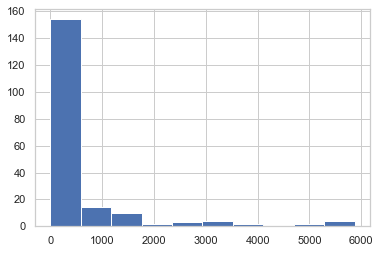

In [530]:
all_data.groupby(['nutriment_nutriscore_tr','nova_score','eco_score']).size().hist()

In [528]:
all_data[all_data['nutriment_nutriscore_tr'].str.contains('%') == True]

,Unnamed: 0,name,bar_code,brand,sales_countries,ingredients_list,ingredients_analysis,nutriment_energy-kj_tr,nutriment_energy-kcal_tr,nutriment_energy_tr,nutriment_fat_tr,nutriment_saturated-fat_tr,nutriment_carbohydrates_tr,nutriment_sugars_tr,nutriment_proteins_tr,nutriment_salt_tr,nutriment_sodium_tr,quantity,labels,packaging,categories,ingredients_origins,manufacturing,traceability_code,additives,eco_score,allergens,nova_score,fats_lipids_quantity,fats_lipids_comment,saturated_acids_quantity,saturated_acids_comment,sugar_quantity,sugar_comment,salt_quantity,salt_comment,nutriment_energy-kj_tr_diff,nutriment_energy-kcal_tr_diff,nutriment_energy_tr_diff,nutriment_fat_tr_diff,nutriment_saturated-fat_tr_diff,nutriment_carbohydrates_tr_diff,nutriment_sugars_tr_diff,nutriment_proteins_tr_diff,nutriment_salt_tr_diff,nutriment_sodium_tr_diff,nutriment_nutrition-score-fr_tr,nutriment_nutrition-score-fr_tr_diff,nutriment_nutriscore_tr,nutriment_nutriscore_tr_diff,Agriculture,Transformation,Conditionnement,Transport,Distribution,Consommation,Score_ACV,markets,generic_name,link,palm_ingredients,brand_owner,producer_info,origin_detail,count_sales_countries,count_additives,count_allergens
53089,1089,6 Authentiques Crêpes Fraîches de Froment - La...,3760130630047,['La Petite Crêpière'],['France'],"['Farine de froment Bretonne', 'farine de blé ...",['Non végétalien'],1170,-93%291,-94%1220 kj(291 kcal),"-100%7,73","-100%2,91","-91%46,8","-79%20,4","-100%7,65","-96%0,788","-96%0,315",340 g,"['Sans conservateurs', 'Fabrication artisanale...","['Frais', 'Plastique', 'Sachet']","['Crêpes et galettes', 'Réfrigérés', 'Crêpes',...","['France', 'Bretagne']","['France', 'Bretagne']",NaN,NaN,B,"['Œufs', 'Gluten', 'Lait']",3.000000,0 g,en faible quantité,0 g,en faible quantité,4.3 g,en faible quantité,0.03 g,en faible quantité,NaN,-93%,-94%,-100%,-100%,-91%,-79%,-100%,-96%,-96%,"-100%10,5",-100%,-100%B,-100%,67.6%,15.0%,9.2%,4.1%,4.2%,0.0%,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,3
64376,376,"Acqua Minerale Naturale Uliveto - 1,5l",8008490000021.000000,['Uliveto'],"['France', 'Italie']",[],[],0,0,0 kj(0 kcal),0,0,"-100%0,001",-100%0,-100%0,"-100%0,049","-100%0,02","1,5 l",NaN,['Plastica'],"['Boissons', 'Eaux', 'Eaux de sources', 'Eaux ...","['Italie', 'en:UE']","['Uliveto terme', 'vicopisano', 'pisa']",NaN,NaN,NaN,NaN,NaN,0 g,en faible quantité,0 g,en faible quantité,0 g,en faible quantité,0 g,en faible quantité,NaN,NaN,NaN,NaN,NaN,-100%,-100%,-100%,-100%,-100%,"-100%0,277",-100%,-100%A,-100%,NaN,NaN,NaN,NaN,NaN,NaN,nan,['Despar'],NaN,NaN,NaN,NaN,NaN,NaN,2,0,0
65101,1101,Biscuit épeautre sésame - Nature bio - 15biscu...,3257983134377.000000,['Nature bio'],"['Belgique', 'France']",[],[],2000,+5%474,+5%1990 kj(474 kcal),"+15%20,8","-11%10,1",-6%64,"-25%29,5","+38%6,5","-7%0,589","-7%0,236","15 biscuits, 170 g","['Bio', 'Bio européen', 'AB Agriculture Biolog...",NaN,"['Snacks', 'Snacks sucrés', 'Biscuits et gâtea...",NaN,NaN,"['EMB 61232A', ""Lonlay-l'Abbaye (Orne, France)""]",NaN,C,NaN,NaN,24 g,en quantité élevée,9 g,en quantité élevée,22 g,en quantité élevée,0.55 g,en quantité modérée,NaN,+5%,+5%,+15%,-11%,-6%,-25%,+38%,-7%,-7%,"-19%19,8",-19%,-19%D,-19%,80.3%,11.4%,3.7%,2.4%,2.2%,0.0%,58.000000,NaN,Biscuits,NaN,NaN,NaN,NaN,NaN,2,0,0
71506,1506,Le Breton de Belle Isle Abricot - Biscuiterie ...,3373030000294,['Biscuiterie des Iles'],['France'],"['Farine de blé', 'beurre concentré 25%', 'suc...",['Non végétalien'],1740,+13%394,+12%1660 kj(394 kcal),"+13%18,8","+22%11,6","+15%50,7","+34%26,8","-2%5,33","-100%0,692","-100%0,277",400 g,NaN,"['Sachet', 'Plastique', 'Sous atmomsphère prot...","['Snacks', 'Desserts', 'Snacks sucrés', 'Biscu...",NaN,"['France', 'Bretagne']",NaN,"['E450i - Pyrophosphate de sodium acide', 'E50...",NaN,"['Œufs', 'Gluten', 'Lait']",4.000000,21.2 g,en quantité élevée,14.1 g,en quantité élevée,36 g,en quantité élevée,0 g,en faible quantité,NaN,+13%,+12%,+13%,+22%,+15%,+34%,-2%,-100%,-100%,"+13%19,5",+13%,+13%E,+13%,NaN,NaN,NaN,NaN,

AttributeError: 'Series' object has no attribute 'split'

<AxesSubplot:>

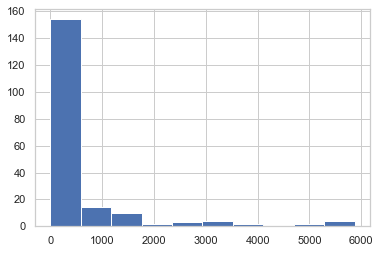

In [519]:
all_data.groupby(['nutriment_nutriscore_tr','nova_score','eco_score']).size().hist()

#### Question_2

In [314]:
filtre_gluten = all_data['labels'].apply(lambda x : (pd.notna(x)) and (('Sans gluten' in x) or ('en:gluten-free' in x)))

In [315]:
filtre_nutri_score = all_data['nutriment_nutriscore_tr'].apply(lambda x : (pd.notna(x)) and x == 'A')
filtre_nova_score = all_data['nova_score'].apply(lambda x : (pd.notna(x)) and x == 1)
filtre_eco_score = all_data['eco_score'].apply(lambda x : (pd.notna(x)) and x == 'A')

In [316]:
all_data.loc[(filtre_gluten) & (filtre_nutri_score) & (filtre_nova_score) & (filtre_eco_score), ['labels','nutriment_nutriscore_tr','nova_score','eco_score']]

,labels,nutriment_nutriscore_tr,nova_score,eco_score
2589,"['Bio', 'Bio européen', 'en:gluten-free', 'DE-...",A,1.000000,A
2869,"['Végétarien', 'Sans gluten', 'Végétalien', 'P...",A,1.000000,A
2994,"['Bio', 'Ecocert', 'Bio européen', 'Sans glute...",A,1.000000,A
5673,"['Peu ou pas de sel', 'Peu ou pas de sucre', '...",A,1.000000,A
5950,"['Sans gluten', 'Enrichi en calcium', 'Riche e...",A,1.000000,A


In [317]:
all_data.loc[(filtre_gluten) & (filtre_nutri_score) & (filtre_nova_score) & (filtre_eco_score)]

,Unnamed: 0,name,bar_code,quantity,brand,categories,labels,markets,sales_countries,ingredients_list,additives,allergens,ingredients_analysis,nova_score,fats_lipids_quantity,fats_lipids_comment,saturated_acids_quantity,saturated_acids_comment,sugar_quantity,sugar_comment,salt_quantity,salt_comment,nutriment_energy-kj_tr,nutriment_energy-kj_tr_diff,nutriment_energy-kcal_tr,nutriment_energy-kcal_tr_diff,nutriment_energy_tr,nutriment_energy_tr_diff,nutriment_fat_tr,nutriment_fat_tr_diff,nutriment_saturated-fat_tr,nutriment_saturated-fat_tr_diff,nutriment_carbohydrates_tr,nutriment_carbohydrates_tr_diff,nutriment_sugars_tr,nutriment_sugars_tr_diff,nutriment_proteins_tr,nutriment_proteins_tr_diff,nutriment_salt_tr,nutriment_salt_tr_diff,nutriment_sodium_tr,nutriment_sodium_tr_diff,nutriment_nutrition-score-fr_tr,nutriment_nutrition-score-fr_tr_diff,nutriment_nutriscore_tr,nutriment_nutriscore_tr_diff,eco_score,Agriculture,Transformation,Conditionnement,Transport,Distribution,Consommation,Score_ACV,packaging,manufacturing,generic_name,ingredients_origins,traceability_code,link,palm_ingredients,producer_info,brand_owner,origin_detail
2589,589,Farine de Maïs Bio - Mon Fournil - 500g,3760130560672.000000,500 g,['Mon Fournil'],"['Aliments et boissons à base de végétaux', ""A...","['Bio', 'Bio européen', 'en:gluten-free', 'DE-...","['CARREFOUR', 'Magasins U']",['France'],['Farine de maïs'],NaN,NaN,"['Sans huile de palme', 'Végétalien', 'Végétar...",1.000000,1.1 g,en faible quantité,0.2 g,en faible quantité,1.1 g,en faible quantité,0.01 g,en faible quantité,1489,-0%,?,NaN,1489 kj(356 kcal),+1%,"1,1",-35%,"0,2",-25%,"77,5",+2%,"1,1",+46%,7,+16%,"0,01",-87%,"0,004",-87%,-1.000000,-222%,A,-222%,A,70.6%,1.8%,11.3%,11.7%,4.5%,0.0%,93.000000,"['Sachet', 'Papier']",['ROLDI - 26 rue de Bourgheim - 67210 GOXWILLER'],Farine de maïs bio,NaN,NaN,https://www.monfournil.fr/produits/farine-de-m...,NaN,NaN,NaN,NaN
2869,869,Ananas origine Philippines en tranches au jus ...,3080920981969.000000,570 g,['St Mamet'],"['Aliments et boissons à base de végétaux', ""A...","['Végétarien', 'Sans gluten', 'Végétalien', 'P...",NaN,['France'],"['Ananas en tranches', ""jus d'ananas"", 'acidif...",['E330 - Acide citrique'],['Aucun'],"['Sans huile de palme', 'Végétalien', 'Végétar...",1.000000,0 g,en faible quantité,0 g,en faible quantité,12 g,en quantité modérée,0 g,en faible quantité,228,-13%,54.5,-15%,228 kj(54 kcal),-16%,0,-100%,0,-100%,12,-21%,12,-16%,"0,5",+28%,0,-100%,0,-100%,-4.000000,NaN,A,NaN,A,21.7%,37.3%,15.4%,18.3%,7.3%,0.0%,95.000000,"['Conserve', 'Boîte', 'Couvercle', 'Métal']",NaN,Ananas en tranches entières au jus d'ananas,"['Philippines', 'Thaïlande']",NaN,NaN,NaN,NaN,NaN,NaN
2994,994,Fusilli Sarrasin - Valpi Bio - 500g,3259011141722.000000,500 g,['Valpi Bio'],"['Aliments et boissons à base de végétaux', ""A...","['Bio', 'Ecocert', 'Bio européen', 'Sans glute...","['Biocoop', 'Biocoop Caluire']",['France'],"['Farine de sarrasin*', "" *Issus de l'agricult...",NaN,NaN,"['Sans huile de palme', 'Végétalien', 'Végétar...",1.000000,2.4 g,en faible quantité,0.7 g,en faible quantité,0.7 g,en faible quantité,0.03 g,en faible quantité,?,NaN,349,-1%,1460 kj(349 kcal),-1%,"2,4",-21%,"0,7",+8%,68,+1%,"0,7",-57%,11,-8%,"0,03",+57%,"0,012",+57%,-6.000000,NaN,A,NaN,A,68.4%,0.0%,15.2%,7.8%,8.6%,0.0%,95.000000,"['Carton', 'Sec', 'Film en plastique', 'Etui e...",['Italie'],"Pâtes alimentaires sans gluten, issues de l'ag...",['Union européenne'],NaN,https://www.valpibio.com/nos-produits/pates-et...,NaN,NaN,NaN,NaN
5673,1673,Tartines craquantes bio au sarrasin sans glute...,3380380046940.000000,150 g,['Le Pain des Fleurs'],"['Aliments et boissons à base de végétaux', ""A...","['Peu ou pas de sel', 'Peu ou pas de sucre', '...",NaN,"['Belgique', 'France']",['Farine de sarrasin'],NaN,['Sarrasin'],"['Sans huile de palme', 'Végétalien', 'Végétar...",1.000000,2.7 g,en faible quantité,0.6 g,en faible quantité,1.7 g,en faible quantité,0 g,en faible quantité,1642,+2%,388,+2%,1642 kj(

#### Question_3:

In [504]:
all_data_sugar = all_data[all_data['nutriment_sugars_tr'] >= '60']
all_data_sugar_number = all_data_sugar['nutriment_sugars_tr'].count()

In [505]:
all_data_sugar_number

58576

#### Question_4: 

In [200]:
all_data[all_data['nutriment_energy-kcal_tr'] >= '500']

,Unnamed: 0,name,bar_code,quantity,brand,categories,labels,markets,sales_countries,ingredients_list,additives,allergens,ingredients_analysis,nova_score,fats_lipids_quantity,fats_lipids_comment,saturated_acids_quantity,saturated_acids_comment,sugar_quantity,sugar_comment,salt_quantity,salt_comment,nutriment_energy-kj_tr,nutriment_energy-kj_tr_diff,nutriment_energy-kcal_tr,nutriment_energy-kcal_tr_diff,nutriment_energy_tr,nutriment_energy_tr_diff,nutriment_fat_tr,nutriment_fat_tr_diff,nutriment_saturated-fat_tr,nutriment_saturated-fat_tr_diff,nutriment_carbohydrates_tr,nutriment_carbohydrates_tr_diff,nutriment_sugars_tr,nutriment_sugars_tr_diff,nutriment_proteins_tr,nutriment_proteins_tr_diff,nutriment_salt_tr,nutriment_salt_tr_diff,nutriment_sodium_tr,nutriment_sodium_tr_diff,nutriment_nutrition-score-fr_tr,nutriment_nutrition-score-fr_tr_diff,nutriment_nutriscore_tr,nutriment_nutriscore_tr_diff,eco_score,Agriculture,Transformation,Conditionnement,Transport,Distribution,Consommation,Score_ACV,packaging,manufacturing,generic_name,ingredients_origins,traceability_code,link,palm_ingredients,producer_info,brand_owner,origin_detail
19,19,Lait d'Amande - Cora Nature Bio - 1L,3.257985e+12,1 L,['Cora Nature Bio'],"['Aliments et boissons à base de végétaux', 'B...","['Bio', 'Bio européen', 'AB Agriculture Biolog...",NaN,['France'],['Eau - amande** 7% - sucre de canne** - arôme...,['E410 - Gomme de caroube'],['Fruits à coque'],"['Sans huile de palme', 'Peut-être végétalien'...",4.0,4.1 g,en quantité modérée,0.4 g,en faible quantité,4.2 g,en quantité modérée,0.025 g,en faible quantité,?,NaN,64,+68%,268 kj(64 kcal),+69%,"4,1",+92%,"0,4",+61%,"4,9",+32%,"4,2",+52%,"1,7",+97%,"0,025",-72%,"0,01",-72%,-1,-780%,A,-780%,D,82.5%,2.9%,5.0%,5.8%,2.9%,0.8%,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,20,Biscottes 6 céréales - Belle france - 300g,3.258561e+12,300 g,['Belle france'],"['Aliments et boissons à base de végétaux', ""A...",NaN,['G20'],['France'],"['farine de blé ', '70%', 'céréales ', '14', '...",['E300 - Acide ascorbique'],"['Gluten', 'Avoine']",[],4.0,4.4 g,en quantité modérée,0.5 g,en faible quantité,6.5 g,en quantité modérée,1.8 g,en quantité élevée,1609,NaN,?,NaN,1609 kj(385 kcal),-4%,"4,4",-45%,"0,5",-78%,"68,2",+4%,"6,5",+22%,"14,1",+13%,"1,8",+22%,"0,72",+22%,7,-18%,C,-18%,B,48.2%,30.5%,12.1%,8.1%,1.1%,0.0%,95.0,NaN,NaN,Biscottes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,22,"Eau De Montagne 1, 5L Bf, - Belle France - 1,5L",3.258561e+12,"1,5 L",['Belle France'],"['Boissons', 'Eaux', 'Eaux de sources', 'Eaux ...",NaN,NaN,['France'],['Eau de source de montagne'],NaN,NaN,"['Sans huile de palme', 'Végétalien', 'Végétar...",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,NaN,?,NaN,NaN,NaN,?,NaN,NaN,NaN,?,NaN,NaN,NaN,?,NaN,NaN,NaN,NaN,NaN,0,-100%,A,-100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Bouteille', 'Plastique', 'Bottle', 'Bouteille']",['France'],NaN,NaN,"['EMB 68204A', 'Metzeral (Haut-Rhin, France)']",NaN,NaN,NaN,NaN,NaN
23,23,Chocolat noir 95 % - Dardenne - 90g,3.258590e+12,90 g,['Dardenne'],"['Snacks', 'Snacks sucrés', 'Cacao et dérivés'...","['Peu ou pas de sel', 'Bio', 'Végétarien', 'Bi...","[""L'Eau Vive""]",['France'],"['Cacao ', 'pâte de cacao', 'beurre de cacao',...",NaN,NaN,"['Sans huile de palme', 'Végétalien', 'Végétar...",3.0,51.8 g,en quantité élevée,20 g,en quantité élevée,7.6 g,en quantité modérée,0.1 g,en faible quantité,?,NaN,637,+15%,2665 kj(637 kcal),+15%,"51,8",+31%,20,-13%,"28,7",-26%,"7,6",-76%,"11,8",+54%,"0,1",+114%,"0,04",+114%,14,-34%,D,-34%,D,85.3%,9.9%,1.2%,3.2%,0.4%,0.0%,24.0,['Papier'],['France'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,24,Chocolat noir 100% Origine Pérou - Dardenne - 70g,3.258590e+12,70 g,['Dardenne'],"['Snacks', 'Snacks sucrés', 'Cacao et dérivés'...","['Bio', 'Végétarien', 'Bio européen', 'Commerc...",NaN,['France'],"['Masse de cacao*', 'beurre de cacao*', ' Caca...",NaN,NaN,"['Sans huile de palme', 'Végétalien', 'Végétar...",3.0,62 g,en quantité élevée,38 g,en quantité élevée,0.3 g,en faible quantité,0 g,en f

#### Question_5:

In [ ]:
all_data['sales_countries'].str.contains('France') | all_data['sales_countries'].str.contains('Belgique')

In [322]:
filtre_sales_country = all_data['sales_countries'].apply(lambda x : (pd.notna(x)) and (('France' in x) or ('Belgique' in x)))



In [328]:
filtre_palm_oil = all_data['ingredients_analysis'].apply(lambda x : (pd.notna(x)) and ('Huile de palme' in x))

In [330]:
all_data.loc[(filtre_sales_country) & (filtre_palm_oil), ['sales_countries','ingredients_analysis']]

,sales_countries,ingredients_analysis
44,['France'],"['Huile de palme', 'Non végétalien', 'Non végé..."
45,['France'],"['Huile de palme', 'Non végétalien', 'Non végé..."
78,['France'],"['Huile de palme', 'Non végétalien']"
89,['France'],['Huile de palme']
111,['France'],"['Huile de palme', 'Peut-être végétalien', 'Vé..."
...,...,...
5924,"['Belgique', 'France', 'Suisse']","['Huile de palme', 'Non végétalien']"
5931,"['Belgique', 'France']",['Huile de palme']
5933,['France'],"['Huile de palme', 'Non végétalien']"
5946,"['France', 'Polynésie française']","['Huile de palme', 'Non végétalien']"


In [331]:
all_data.loc[(filtre_sales_country) & (filtre_palm_oil)]

,Unnamed: 0,name,bar_code,quantity,brand,categories,labels,markets,sales_countries,ingredients_list,additives,allergens,ingredients_analysis,nova_score,fats_lipids_quantity,fats_lipids_comment,saturated_acids_quantity,saturated_acids_comment,sugar_quantity,sugar_comment,salt_quantity,salt_comment,nutriment_energy-kj_tr,nutriment_energy-kj_tr_diff,nutriment_energy-kcal_tr,nutriment_energy-kcal_tr_diff,nutriment_energy_tr,nutriment_energy_tr_diff,nutriment_fat_tr,nutriment_fat_tr_diff,nutriment_saturated-fat_tr,nutriment_saturated-fat_tr_diff,nutriment_carbohydrates_tr,nutriment_carbohydrates_tr_diff,nutriment_sugars_tr,nutriment_sugars_tr_diff,nutriment_proteins_tr,nutriment_proteins_tr_diff,nutriment_salt_tr,nutriment_salt_tr_diff,nutriment_sodium_tr,nutriment_sodium_tr_diff,nutriment_nutrition-score-fr_tr,nutriment_nutrition-score-fr_tr_diff,nutriment_nutriscore_tr,nutriment_nutriscore_tr_diff,eco_score,Agriculture,Transformation,Conditionnement,Transport,Distribution,Consommation,Score_ACV,packaging,manufacturing,generic_name,ingredients_origins,traceability_code,link,palm_ingredients,producer_info,brand_owner,origin_detail
44,44,Croque monsieur - Leader Price - 200g,3263859462017.000000,200 g,['Leader Price'],"['Sandwichs', 'Croque-monsieur']",NaN,['Leader Price'],['France'],['farine de blé - eau - jambon cuit sandard 20...,"['E450 - Diphosphates', '', 'Risque élevé de s...","['Gluten', 'Lait']","['Huile de palme', 'Non végétalien', 'Non végé...",4.000000,7.3 g,en quantité modérée,2.7 g,en quantité modérée,6.9 g,en quantité modérée,0.5 g,en quantité modérée,?,NaN,218,-8%,912 kj(218 kcal),-10%,"7,3",-30%,"2,7",-48%,26,+4%,"6,9",+125%,11,+1%,"0,5",-66%,"0,2",-66%,1,-92%,B,-92%,D,75.7%,13.8%,5.3%,3.1%,1.7%,0.5%,51.000000,NaN,NaN,NaN,NaN,"['EMB 42127A', 'Mably (Loire, France)']",NaN,['Huile de palme'],NaN,NaN,NaN
45,45,10 Knacks de Poulet - Leader Price - 350g,3263859580919.000000,350 g,['Leader Price'],"['Viandes', 'Charcuteries', 'Saucisses', 'Sauc...",NaN,"['Franprix', 'Leader Price']",['France'],"[""Peaux de poulet - viande de poulet 28 % - vi...","['E250 - Nitrite de sodium', '', 'Risque élevé...",NaN,"['Huile de palme', 'Non végétalien', 'Non végé...",4.000000,19 g,en quantité modérée,6.5 g,en quantité élevée,0.3 g,en faible quantité,2.01 g,en quantité élevée,?,NaN,229,+11%,958 kj(229 kcal),+10%,19,+23%,"6,5",+49%,1,-54%,"0,3",-55%,"12,4",-7%,"2,01",+5%,"0,804",+5%,16,+25%,D,+25%,E,87.6%,6.5%,1.9%,1.1%,0.6%,2.4%,22.000000,"['Plastique', 'Sous-vide']",NaN,Knacks de poulet cuites traitées en salaison,NaN,['PL 10.160.501 WE'],NaN,['Huile de palme'],NaN,NaN,NaN
78,78,Glace Daim - 6cônes x 65g,3274661100387.000000,6 cônes x 65g,['Daim'],"['Desserts', 'Surgelés', 'Desserts glacés', 'G...",NaN,['Magasins U'],['France'],"['lait écrémé reconstitué', 'sucre', 'graisses...","['E322i - Lécithine', ""E414 - Gomme d'acacia"",...","['Gluten', 'Lait', 'Fruits à coque', 'Soja']","['Huile de palme', 'Non végétalien']",4.000000,18 g,en quantité modérée,14 g,en quantité élevée,33 g,en quantité élevée,0.33 g,en quantité modérée,?,NaN,340,+46%,1423 kj(340 kcal),+46%,18,+54%,14,+84%,41,+47%,33,+41%,"3,1",-2%,"0,33",+120%,"0,132",+120%,22,+64%,E,+64%,C,60.7%,19.6%,5.6%,5.1%,5.7%,3.3%,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,['Huile de palme'],NaN,NaN,NaN
89,89,Christstollen aux fruits et amandes - Fortweng...,3279130104217.000000,200 g,['Fortwenger'],"['Snacks', 'Snacks sucrés', 'Biscuits et gâtea...","['Huile de palme durable', 'Fabriqué en Allema...",['Magasin U'],['France'],"['Raisins secs 25%', 'farine de blé', 'sucre',...","['E330 - Acide citrique', 'E420 - Sorbitol', ""...","['Gluten', 'Fruits à coque']",['Huile de palme'],4.000000,17 g,en quantité modérée,7.5 g,en quantité élevée,34 g,en quantité élevée,0.48 g,en quantité modérée,?,NaN,401,-7%,1678 kj(401 kcal),-7%,17,-11%,"7,5",-12%,55,-4%,34,+17%,"5,3",-10%,"0,48",-15%,"0,192",-15%,18,-3%,D,-3%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,"['sachet transparent', 'Sachet plastique']",['Allemagne'],Stollen à

#### Question_6:

In [ ]:
#all_data['products_palm_oil'] = #ajouter une comlonne 

<AxesSubplot:>

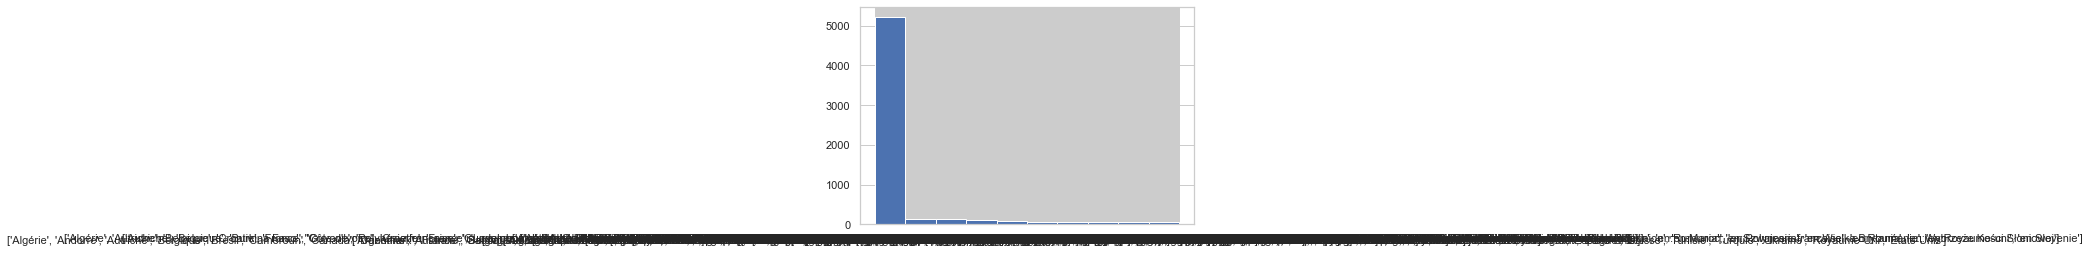

In [332]:
all_data['sales_countries'].hist()

In [336]:
all_data['sales_countries']

0                                              ['France']
1                                              ['France']
2                                              ['France']
3                                              ['France']
4                                              ['France']
                              ...                        
5995                                           ['France']
5996                               ['Belgique', 'France']
5997                                           ['France']
5998    ['Belgique', 'France', 'Allemagne', 'Luxembour...
5999    ['Belgique', 'France', 'Allemagne', 'Pays-Bas'...
Name: sales_countries, Length: 6000, dtype: object

In [356]:
all_data.loc[all_data['sales_countries'].apply(lambda x: ((x.count(',')+1) if pd.notna(x) else 0)>1)]

,Unnamed: 0,name,bar_code,brand,sales_countries,ingredients_list,ingredients_analysis,nutriment_energy-kj_tr,nutriment_energy-kcal_tr,nutriment_energy_tr,nutriment_fat_tr,nutriment_saturated-fat_tr,nutriment_carbohydrates_tr,nutriment_sugars_tr,nutriment_proteins_tr,nutriment_salt_tr,nutriment_sodium_tr,quantity,labels,packaging,categories,ingredients_origins,manufacturing,traceability_code,additives,eco_score,allergens,nova_score,fats_lipids_quantity,fats_lipids_comment,saturated_acids_quantity,saturated_acids_comment,sugar_quantity,sugar_comment,salt_quantity,salt_comment,nutriment_energy-kj_tr_diff,nutriment_energy-kcal_tr_diff,nutriment_energy_tr_diff,nutriment_fat_tr_diff,nutriment_saturated-fat_tr_diff,nutriment_carbohydrates_tr_diff,nutriment_sugars_tr_diff,nutriment_proteins_tr_diff,nutriment_salt_tr_diff,nutriment_sodium_tr_diff,nutriment_nutrition-score-fr_tr,nutriment_nutrition-score-fr_tr_diff,nutriment_nutriscore_tr,nutriment_nutriscore_tr_diff,Agriculture,Transformation,Conditionnement,Transport,Distribution,Consommation,Score_ACV,markets,generic_name,link,palm_ingredients,brand_owner,producer_info,origin_detail
12,12,Beaufort - Les Délices de Belle France - 224g,2225666031498.000000,"['Les Délices de Belle France', 'Belle France']","['Belgique', 'France']","['Lait cru de vache', 'sel', 'ferments', ' pré...","['Sans huile de palme', 'Non végétalien', 'Peu...",1630,390,1630 kj(390 kcal),32,20,1,0,27,1,"0,4",224 g,['AOP'],NaN,"['Produits laitiers', 'Produits fermentés', 'P...",['Francaise'],"[""fabrication Canton d'Aimé"", 'Savoie']","['FR 63.113.081 CE', 'Clermont-Ferrand (Puy-de...",NaN,D,NaN,3.000000,32 g,en quantité élevée,20 g,en quantité élevée,0 g,en faible quantité,1 g,en quantité modérée,-2%,-3%,-3%,-0%,-3%,+9%,-100%,+2%,-12%,-12%,13.000000,-6%,D,-6%,82.8%,8.1%,3.5%,3.6%,1.6%,0.4%,49.000000,['Colruyt'],"Fromage au lait cru entier de vache, à pâte pr...",NaN,NaN,NaN,NaN,NaN
119,119,Jus - tropicana - 1,6191503208223.000000,['Tropicana'],"['France', 'Tunisie']",['eau sucre'],"['Sans huile de palme', 'Végétalien', 'Végétar...",?,53,222 kj(53 kcal),"0,1","0,1",13,"0,1","0,1",0,0,1,NaN,NaN,['Jus'],NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.1 g,en faible quantité,0.1 g,en faible quantité,0.1 g,en faible quantité,0 g,en faible quantité,NaN,+23%,+25%,-35%,+240%,+33%,-99%,-67%,-100%,-100%,0.000000,-100%,B,-100%,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,185,Iglo Schlemmer Filet Hollandaise - 380g,4250241206167.000000,NaN,"['France', 'Allemagne']",[],[],?,?,NaN,?,NaN,?,NaN,?,NaN,NaN,380 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,214,Madeleines longues chocolat - 250g,3700157513169.000000,NaN,"['France', 'Guyane']",[],[],?,?,NaN,?,NaN,?,NaN,?,NaN,NaN,250 g,NaN,NaN,"['Biscuits et gâteaux', 'Gâteaux', 'Gâteaux au...",NaN,NaN,NaN,NaN,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.9%,10.9%,2.4%,2.5%,1.3%,0.0%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,258,Fresh Tagliatelle - M&S,635332.000000,['M&S'],"['France', 'Royaume-Uni']",[],[],?,303,1268 kj(303 kcal),"3,2","1,1","54,6",1,"12,5","0,13","0,052",NaN,NaN,NaN,"['Aliments et boissons à base de végétaux', ""A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2 g,en quantité modérée,1.1 g,en faible quantité,1 g,en faible quantité,0.13 g,en faible quantité,NaN,-9%,-9%,+24%,+58%,-12%,-64%,+8%,-39%,-39%,-1.000000,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,['Marks & Spencer'],NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805774,1912,Country knake - Continental Bakeries - 250g,8710445023770.000000,['Continental Bakeries'],"['France', 'Allemagne']","['Roggenvol

In [361]:
all_data['sales_countries'].hist('sales_countries')

0         ['France']
1         ['France']
2         ['France']
3         ['France']
4         ['France']
             ...    
805857    ['France']
805858    ['France']
805859    ['France']
805860    ['France']
805861    ['France']
Name: sales_countries, Length: 805862, dtype: object

In [367]:
all_data['count_sales_countries'] = all_data['sales_countries'].apply(lambda x: (x.count(',')+1) if pd.notna(x) else 0)

In [369]:
all_data['count_sales_countries']

0         1
1         1
2         1
3         1
4         1
         ..
805857    1
805858    1
805859    1
805860    1
805861    1
Name: count_sales_countries, Length: 805862, dtype: int64

In [374]:
max_count_sales_country = all_data['count_sales_countries'].max()

In [375]:
max_count_sales_country

113

<AxesSubplot:>

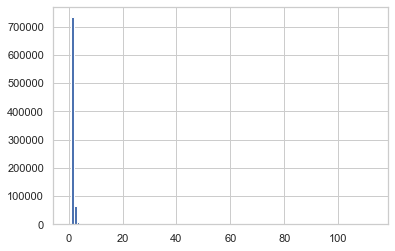

In [376]:
all_data['count_sales_countries'].hist(bins=max_count_sales_country)

<AxesSubplot:ylabel='Frequency'>

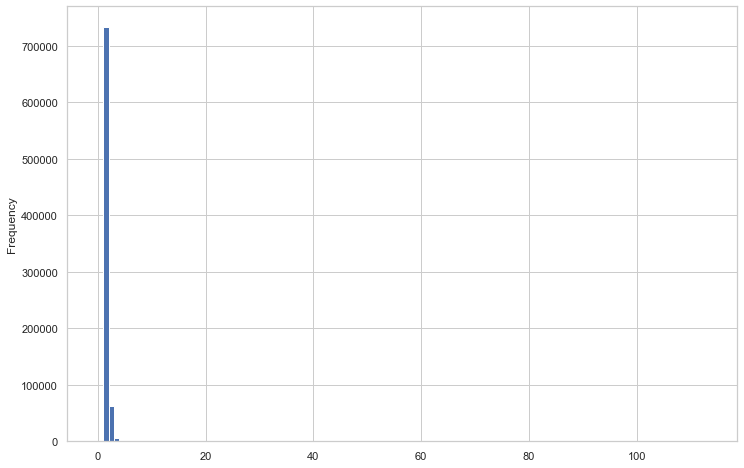

In [386]:
all_data['count_sales_countries'].plot(kind='hist',figsize=(12,8),bins=max_count_sales_country)

In [511]:
len(all_data.index)

805862

* * *

## Question bonus

### Allergènes

33

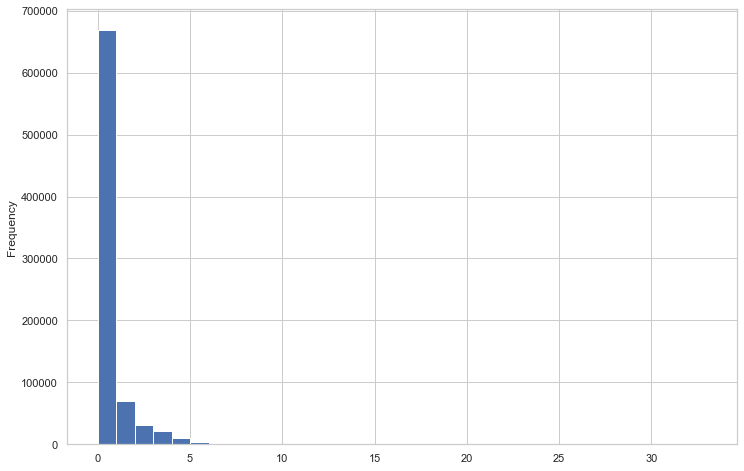

In [450]:
all_data['count_allergens'] = all_data['allergens'].apply(lambda x: (x.count(',')+1) if pd.notna(x) else 0)
#distrubution des produits par nombre d’allergènes 
max_nb_allergen = all_data['count_allergens'].max()
all_data['count_allergens'].plot(kind='hist',figsize=(12,8),bins=max_nb_allergen)
max_nb_allergen


In [457]:
all_data[all_data['count_allergens'] == max_nb_allergen]

,Unnamed: 0,name,bar_code,brand,sales_countries,ingredients_list,ingredients_analysis,nutriment_energy-kj_tr,nutriment_energy-kcal_tr,nutriment_energy_tr,nutriment_fat_tr,nutriment_saturated-fat_tr,nutriment_carbohydrates_tr,nutriment_sugars_tr,nutriment_proteins_tr,nutriment_salt_tr,nutriment_sodium_tr,quantity,labels,packaging,categories,ingredients_origins,manufacturing,traceability_code,additives,eco_score,allergens,nova_score,fats_lipids_quantity,fats_lipids_comment,saturated_acids_quantity,saturated_acids_comment,sugar_quantity,sugar_comment,salt_quantity,salt_comment,nutriment_energy-kj_tr_diff,nutriment_energy-kcal_tr_diff,nutriment_energy_tr_diff,nutriment_fat_tr_diff,nutriment_saturated-fat_tr_diff,nutriment_carbohydrates_tr_diff,nutriment_sugars_tr_diff,nutriment_proteins_tr_diff,nutriment_salt_tr_diff,nutriment_sodium_tr_diff,nutriment_nutrition-score-fr_tr,nutriment_nutrition-score-fr_tr_diff,nutriment_nutriscore_tr,nutriment_nutriscore_tr_diff,Agriculture,Transformation,Conditionnement,Transport,Distribution,Consommation,Score_ACV,markets,generic_name,link,palm_ingredients,brand_owner,producer_info,origin_detail,count_sales_countries,count_additives,count_allergens
292123,123,Poêlée de St Jacques au riz basmati Saveurs - ...,3368955876369.000000,"['U Saveurs', 'U']",['France'],"['Riz basmati précuit 33% ', 'eau', 'riz basma...","['Non végétalien', 'Non végétarien']",424,101,424 kj(101 kcal),"3,2","0,8",13,"1,4","4,6","0,5","0,2",600 g,"['Cuisiné en France', 'Arômes naturels', 'Sans...","['Sachet', 'Plastique', 'surgelé', 'Surgelés']","['Surgelés', 'Plats préparés', 'Plats préparés...",NaN,NaN,NaN,NaN,NaN,"['Crustacés', 'Poisson', 'Lait', 'Mollusques',...",3.000000,3.2 g,en quantité modérée,0.8 g,en faible quantité,1.4 g,en faible quantité,0.5 g,en quantité modérée,-30%,-32%,-32%,-54%,-69%,-1%,-33%,-32%,-34%,-34%,0,-100%,B,-100%,NaN,NaN,NaN,NaN,NaN,NaN,nan,"['Hyper U', 'Magasins U']",Poêlée de Saint Jacques au riz basmati,NaN,NaN,NaN,NaN,NaN,1,0,33


### Additives

In [451]:
all_data['count_additives'] = all_data['additives'].apply(lambda x: (x.count(',')+1) if pd.notna(x) else 0)


<AxesSubplot:ylabel='Frequency'>

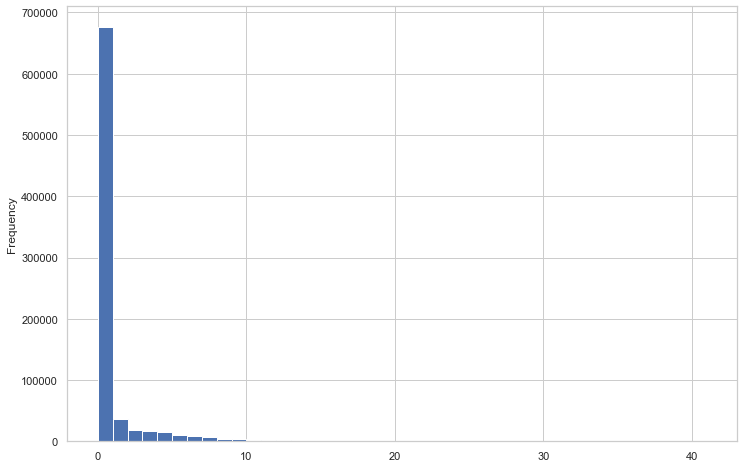

In [454]:
#distrubution des produits par additifs
max_nb_additive = all_data['count_additives'].max()
all_data['count_additives'].plot(kind='hist',figsize=(12,8),bins=max_nb_additive)

In [445]:
all_data[all_data['count_additives'] >= 10]

,Unnamed: 0,name,bar_code,brand,sales_countries,ingredients_list,ingredients_analysis,nutriment_energy-kj_tr,nutriment_energy-kcal_tr,nutriment_energy_tr,nutriment_fat_tr,nutriment_saturated-fat_tr,nutriment_carbohydrates_tr,nutriment_sugars_tr,nutriment_proteins_tr,nutriment_salt_tr,nutriment_sodium_tr,quantity,labels,packaging,categories,ingredients_origins,manufacturing,traceability_code,additives,eco_score,allergens,nova_score,fats_lipids_quantity,fats_lipids_comment,saturated_acids_quantity,saturated_acids_comment,sugar_quantity,sugar_comment,salt_quantity,salt_comment,nutriment_energy-kj_tr_diff,nutriment_energy-kcal_tr_diff,nutriment_energy_tr_diff,nutriment_fat_tr_diff,nutriment_saturated-fat_tr_diff,nutriment_carbohydrates_tr_diff,nutriment_sugars_tr_diff,nutriment_proteins_tr_diff,nutriment_salt_tr_diff,nutriment_sodium_tr_diff,nutriment_nutrition-score-fr_tr,nutriment_nutrition-score-fr_tr_diff,nutriment_nutriscore_tr,nutriment_nutriscore_tr_diff,Agriculture,Transformation,Conditionnement,Transport,Distribution,Consommation,Score_ACV,markets,generic_name,link,palm_ingredients,brand_owner,producer_info,origin_detail,count_sales_countries,count_additives
426,426,wraps blé nature - mission wraps - 6,2599900.000000,['mission wraps'],['France'],['Galette de blé Ingrédients: farine de fromen...,"[""Pourrait contenir de l'huile de palme""]",?,?,NaN,?,NaN,?,NaN,?,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,"['E422 - Glycérol', 'E412 - Gomme de guar', 'E...",NaN,['Gluten'],4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10
881,881,Filet Mignon en Croûte - Metzger Muller - 972g,286084076425.000000,['Metzger Muller'],['France'],"['Filet mignon de porc 33 %', 'farine de BLÉ',...","[""Pourrait contenir de l'huile de palme"", 'Non...",1027,?,1027 kj(245 kcal),"11,9","7,1","20,9","0,5","13,1","1,9","0,76",972 g,"['Point Vert', 'Pur beurre', ""Savourez l'Alsace""]","['Frais', 'Plastique']","['Plats préparés', 'Produits à la viande', 'Pl...",['Union européenne'],"['France', 'Alsace', 'Ittenheim']","['FR 67.226.002 CE', 'Ittenheim (Bas-Rhin, Fra...","['E450 - Diphosphates', '', 'Risque élevé de s...",NaN,"['Œufs', 'Gluten', 'Lait']",4.000000,11.9 g,en quantité modérée,7.1 g,en quantité élevée,0.5 g,en faible quantité,1.9 g,en quantité élevée,+37%,NaN,+34%,+31%,+137%,+42%,-73%,+57%,+64%,+64%,18.000000,+205%,D,+205%,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,Filet Mignon en Croûte,NaN,NaN,NaN,NaN,NaN,1,14
975,975,Le Bar à Bonbons - Cocktail pêche - 150g,3760156001494.000000,['Le Bar à bonbons'],['France'],"['sucre', 'guimauve 13% ', 'sirop de glucose e...","[""Pourrait contenir de l'huile de palme"", 'Non...",1680,?,1680 kj(402 kcal),"< 0,5","< 0,1",98,95,1,"0,025","0,01",150g,NaN,['bouteille en verre'],"['Snacks', 'Snacks sucrés', 'Confiseries', 'Bo...",['France'],['France'],"['EMB 71076S', 'Chalon-sur-Saône (Saône-et-Loi...","['E428 - Gélatine', 'E420 - Sorbitol', 'E100 -...",C,['Gluten'],4.000000,0.5 g,en faible quantité,0.1 g,en faible quantité,95 g,en quantité élevée,0.025 g,en faible quantité,+8%,NaN,+12%,-73%,-91%,+18%,+64%,-53%,-79%,-79%,15.000000,+4%,D,+4%,90.3%,5.0%,2.2%,2.0%,0.5%,0.0%,34.000000,['super u'],NaN,https://www.google.com/url?sa=t&source=web&rct...,NaN,NaN,NaN,NaN,1,18
1461,1461,"M &M'S Chocolate Candy, Peanut Butter",40000509301.000000,"[""M&M's""]","['France', 'États-Unis']","['Milk chocolate ', 'sugar', 'cocoa butter', '...","['Huile de palme', 'Non végétalien']",?,536,2243 kj(536 kcal),"28,57","17,86","57,14",50,"10,71","0,535","0,214",NaN,NaN,NaN,"['Snacks', 'Snacks sucrés', 'Confiseries']",NaN,NaN,NaN,"['E322i - Lécithine', 'E1400 - Dextrines', 'E1...",NaN,"['Lait', 'Arachides', 'Soja']",4.000000,28.6 g,en quantité élevée,17.9 g,en quantité élevée,50 g,en quantité élevée,0.535 g,en quantité modérée,NaN,+28%,+27%,+94%,+176%,-14%,+1%,+154%,+264%,+264%,25.000000,+37%,E,+37%,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,Mars Choc

In [446]:
all_data[all_data['count_additives'] == 41]

,Unnamed: 0,name,bar_code,brand,sales_countries,ingredients_list,ingredients_analysis,nutriment_energy-kj_tr,nutriment_energy-kcal_tr,nutriment_energy_tr,nutriment_fat_tr,nutriment_saturated-fat_tr,nutriment_carbohydrates_tr,nutriment_sugars_tr,nutriment_proteins_tr,nutriment_salt_tr,nutriment_sodium_tr,quantity,labels,packaging,categories,ingredients_origins,manufacturing,traceability_code,additives,eco_score,allergens,nova_score,fats_lipids_quantity,fats_lipids_comment,saturated_acids_quantity,saturated_acids_comment,sugar_quantity,sugar_comment,salt_quantity,salt_comment,nutriment_energy-kj_tr_diff,nutriment_energy-kcal_tr_diff,nutriment_energy_tr_diff,nutriment_fat_tr_diff,nutriment_saturated-fat_tr_diff,nutriment_carbohydrates_tr_diff,nutriment_sugars_tr_diff,nutriment_proteins_tr_diff,nutriment_salt_tr_diff,nutriment_sodium_tr_diff,nutriment_nutrition-score-fr_tr,nutriment_nutrition-score-fr_tr_diff,nutriment_nutriscore_tr,nutriment_nutriscore_tr_diff,Agriculture,Transformation,Conditionnement,Transport,Distribution,Consommation,Score_ACV,markets,generic_name,link,palm_ingredients,brand_owner,producer_info,origin_detail,count_sales_countries,count_additives
152202,202,Hot dogs x 2 - Ferial - 240g,3661112050740,"['Ferial', 'Marque Repère', ""Pic'Express""]",['France'],['Pain special 48%* : farine de {allergene}ble...,"[""Pourrait contenir de l'huile de palme"", 'Non...",1125,?,1125 kj(269 kcal),13,"5,2",26,"4,7",11,"1,8","0,72",240 g,"['Bio', 'Ne pas recongeler', 'Décongelé']",NaN,NaN,NaN,NaN,"['FR 22.046.001 CE', ""Collinée (Côtes-d'Armor,...","[""E471 - Mono- et diglycérides d'acides gras a...",NaN,"['Gluten', 'Lait', 'Moutarde']",4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,['Leclerc'],NaN,NaN,NaN,NaN,NaN,NaN,1,41


#### <span style = "color:red">Remarque:</span>
>La majorité des produits ne contiennent pas d'additif contrairement a ce que j’attends.
Malgré cela ily'a plus que 11000 produits contenant plus que 10 additifs et un maximale de 41 

### Repère nutritionnel

In [395]:
all_data['sugar_comment'].unique()

array([nan, 'en quantité élevée', 'en faible quantité',
       'en quantité modérée'], dtype=object)

<AxesSubplot:>

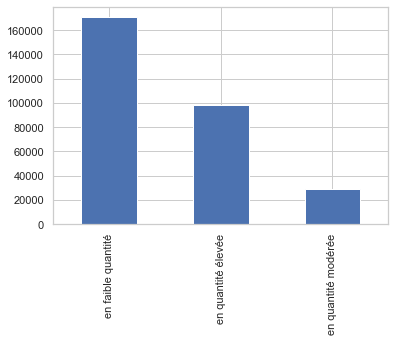

In [398]:
#distrubution produits/ quantité de sucre
all_data.sugar_comment.value_counts().plot.bar()

<AxesSubplot:>

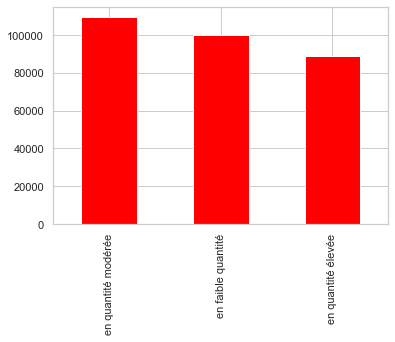

In [401]:
#distrubution produits/ quantité de la matière graçe
all_data.fats_lipids_comment.value_counts().plot.bar(color='red')

<AxesSubplot:>

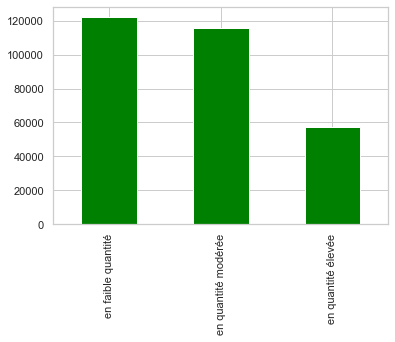

In [447]:
#distrubution produits/ quantité au sel
all_data.salt_comment.value_counts().plot.bar(color='green')

In [431]:
#répartition des repère nutritionnelle pour 100g/quantité 
salt_comment = all_data['salt_comment'].value_counts(dropna=False)
sugar_comment = all_data['sugar_comment'].value_counts(dropna=False)
fats_lipids_comment = all_data['fats_lipids_comment'].value_counts(dropna=False)
saturated_acids_comment = all_data['saturated_acids_comment'].value_counts(dropna=False)

index_comment=[np.nan, 'en faible quantité', 'en quantité modérée', 'en quantité élevée']
df_quantity = pd.DataFrame({'sugar': sugar_comment, 'salt' : salt_comment, 'fats_lipids': fats_lipids_comment, 'saturated_acids': saturated_acids_comment}, index=index_comment)




In [432]:
df_quantity



,sugar,salt,fats_lipids,saturated_acids
NaN,507398,510800,507192,507903
en faible quantité,170816,122268,100010,127334
en quantité modérée,29302,115610,109597,68577
en quantité élevée,98346,57184,89063,102048


<AxesSubplot:>

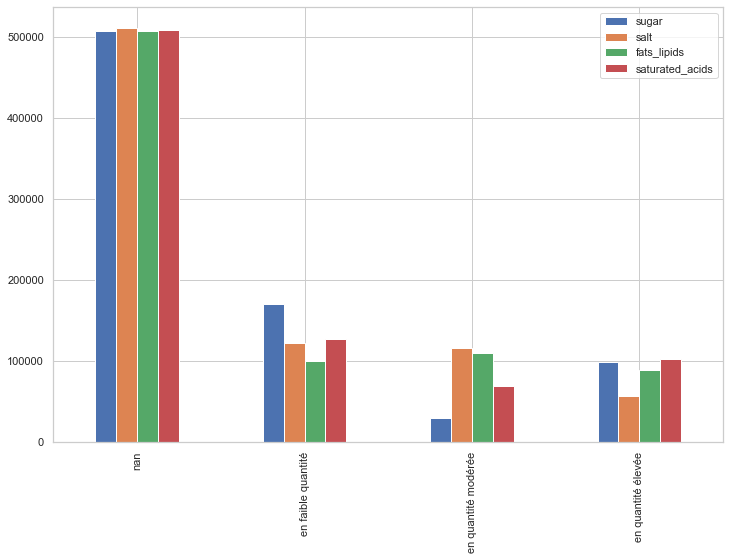

In [436]:
df_quantity.plot.bar(figsize=(12,8))

#### <span style = "color:red">Remarque:</span>
>le sucre existe soit en faible quantité soit en quantité élevée 

>les lipides sont moyennement repartie 

>le sel est présent plus en faible quantité ou quantité modéré

>l'acide gras saturé est moins présente en quantité modéré 

### Notation des produits

In [479]:
nova_score = all_data.loc[pd.isna(all_data['nova_score']),'nova_score'].value_counts(dropna=False)[np.nan]

In [488]:
len_data = len(all_data.index)
nova_score = all_data.loc[pd.isna(all_data['nova_score']),'nova_score'].value_counts(dropna=False)[np.nan]
eco_score = all_data.loc[pd.isna(all_data['eco_score']),'eco_score'].value_counts(dropna=False)[np.nan]
nutriment_nutriscore_tr = all_data.loc[pd.isna(all_data['nutriment_nutriscore_tr']),'nutriment_nutriscore_tr'].value_counts(dropna=False)[np.nan]

index_score=['len_data','nova_score', 'eco_score', 'nutriscore']
df_score= pd.DataFrame({'score': [len_data,nova_score,eco_score,nutriment_nutriscore_tr]}, index=index_score)




In [ ]:
df_score= pd.DataFrame({'score': [len_data,nova_score,eco_score,nutriment_nutriscore_tr]}, index=index_score)

In [489]:
df_score

,score
len_data,805862
nova_score,600316
eco_score,541912
nutriscore,519675


<AxesSubplot:>

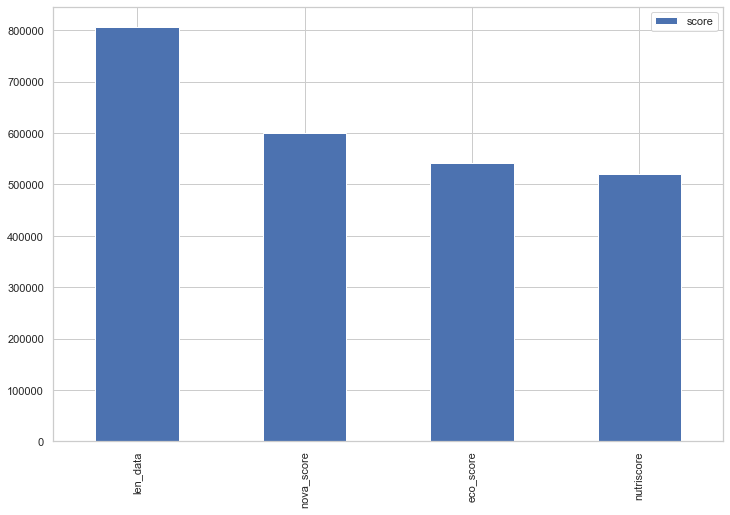

In [490]:
df_score.plot.bar(figsize=(12,8))



#### <span style = "color:red">Remarque:</span>
>Le nombre des produits noté represente pratiquement le 1/4 de tout les produits existants 

## Conclusion : 
                    Les dernières analyses montrent qu'il n'y a pas beaucoup des produits contenant des allergènes 
                    et des additifs mais le système de notation ne couvre que l'un quart des produits.
                    Une augmentation de nombre de produits noté peut aider le consommateur a mieux choisir.